In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('cardio_train.csv',sep=';')
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [5]:
data.shape

(69301, 13)

In [6]:
data.isnull().sum()
#no missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.dtypes
#no non-numeric features

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
data.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#can remove id column
#change age from days to years-->age/365
data['age']=data['age']/365
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [10]:
data.drop(['id'],axis=1,inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


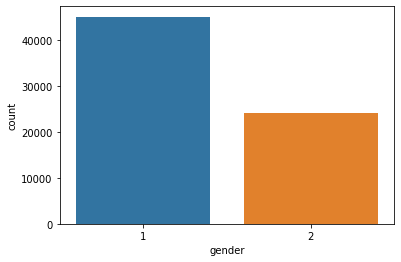

In [11]:
sns.countplot(x='gender',data=data)

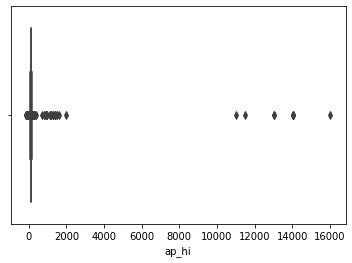

In [12]:
#check presence of outiers
sns.boxplot(data['ap_hi'])

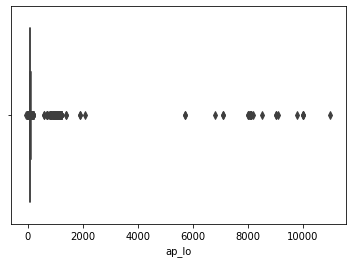

In [13]:
sns.boxplot(data['ap_lo'])

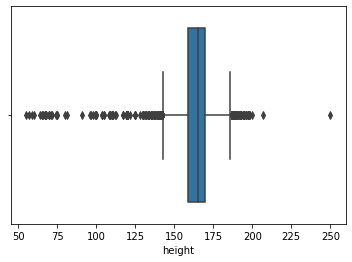

In [14]:
sns.boxplot(data['height'])

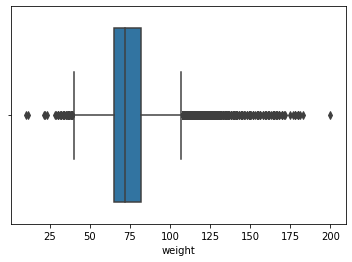

In [15]:
sns.boxplot(data['weight'])

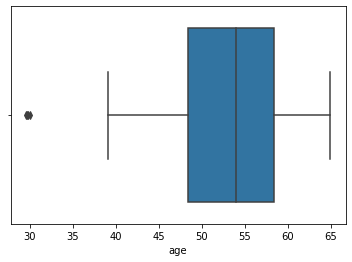

In [16]:
sns.boxplot(data['age'])

In [17]:
#remove outliers
def remove_outlier(data_in, col_name, thres=1.5):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    mask = (data_in[col_name] > fence_high) | (data_in[col_name] < fence_low)
    data_in.loc[mask, col_name] = np.nan
    return data_in


In [18]:
remove_outlier(data,'ap_hi')
remove_outlier(data,'ap_lo')
remove_outlier(data,'height')
remove_outlier(data,'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0
1,40.131507,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1
2,60.002740,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0
3,39.860274,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0
4,64.090411,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0
5,57.926027,1,164.0,61.0,100.0,70.0,1,1,0,0,1,0
6,49.547945,1,162.0,72.0,100.0,70.0,1,1,0,0,1,0
7,61.772603,1,161.0,93.0,140.0,90.0,2,1,0,0,1,1
8,58.219178,1,157.0,68.0,110.0,80.0,1,1,0,0,1,0
9,61.495890,1,158.0,65.0,140.0,90.0,3,1,0,0,1,1


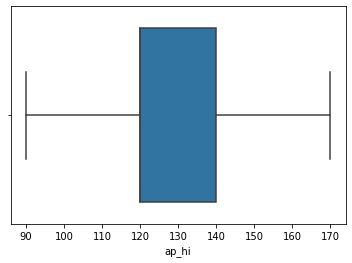

In [19]:
#recheck
sns.boxplot(data['ap_hi'])

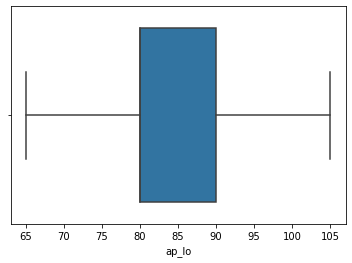

In [20]:
sns.boxplot(data['ap_lo'])

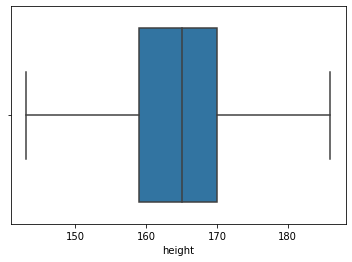

In [21]:
sns.boxplot(data['height'])

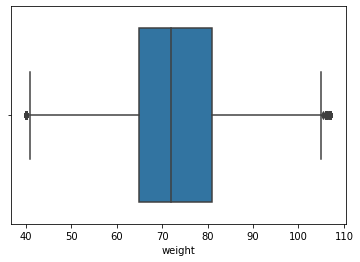

In [22]:
sns.boxplot(data['weight'])

In [23]:
#check for null values after treating outliers
data.isnull().sum()

age               0
gender            0
height          515
weight         1802
ap_hi          1419
ap_lo          4584
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [24]:
#treat null values
data['height'].fillna(data['height'].median(), inplace=True)
data['weight'].fillna(data['weight'].mean(), inplace=True)
data['ap_hi'].fillna(data['ap_hi'].mean(), inplace=True)
data['ap_lo'].fillna(data['ap_lo'].mean(), inplace=True)

In [25]:
#recheck
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [27]:
#features and target definition
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]  #last column

In [35]:
print((x.shape,y.shape))


((69301, 11), (69301,))


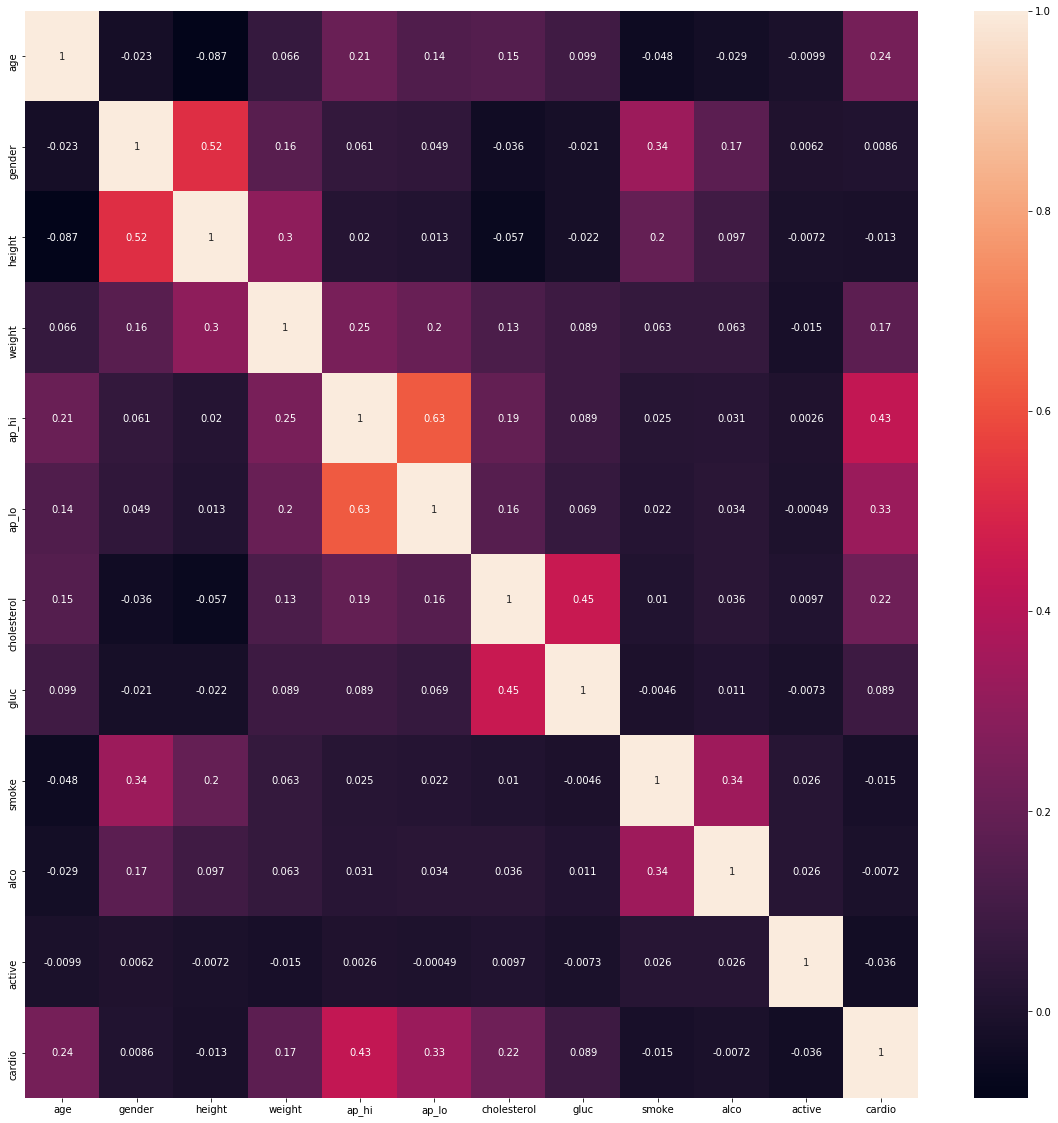

In [36]:
corr_hmap=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [38]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((51975, 11), (51975,), (17326, 11), (17326,))

In [39]:
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
model=[LDA(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),LinearSVC(),GaussianNB()]

for m in model:
    print("Model :",m ,"\n")
    
    m.fit(x_train,y_train)
    print("Model Score :",m.score(x_train,y_train) ,"\n")  
    
    predm=np.array(m.predict(x_test))
    print("Model Pediction :",predm  ,"\n")
    
    print("Confusion Matrix :","\n", confusion_matrix(y_test,predm)  ,"\n")
    
    print("Accuracy Score : ", accuracy_score(y_test,predm)  ,"\n")
    
    print("Classification Report : ", classification_report(y_test,predm) ,"\r\r\n\n")

Model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

Model Score : 0.7256180856180856 

Model Pediction : [0 0 0 ... 1 0 0] 

Confusion Matrix : 
 [[6796 1858]
 [2920 5752]] 

Accuracy Score :  0.7242294817037978 

Classification Report :                precision    recall  f1-score   support

           0       0.70      0.79      0.74      8654
           1       0.76      0.66      0.71      8672

    accuracy                           0.72     17326
   macro avg       0.73      0.72      0.72     17326
weighted avg       0.73      0.72      0.72     17326
 


Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_s